## **Librerias**

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.metrics import Precision,Recall,Accuracy
from tensorflow.keras.models import load_model

GPU TEST 🧪🧪

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU") #Se usa para evitar error por falta de memoria
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## **Creacion Data Set 💾**

In [3]:
Data_dir = './Data'
Data_train = './Data/train'
img_ext = ['png']

In [4]:
sub_carpetas = os.listdir(os.path.join(Data_dir,'train')) 
sub_carpetas

['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST']

In [5]:
os.listdir(Data_train)

['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST']

In [6]:
for img_class in os.listdir(Data_train):
    for image in os.listdir(os.path.join(Data_train,img_class)):
        image_path = os.path.join(Data_train,img_class,image)
        try:
            img = cv2.imread(image_path)   
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print('Formato no permitido'.format(image_path))
                os.remove(image_path)
        except Exception as e:  
            print("PRoblema con la imagen".format(image_path))

In [7]:
# for img_class in os.listdir(Data_train):
#     for image in os.listdir(os.path.join(Data_train,img_class)):
#         print(image)

In [8]:
data = tf.keras.utils.image_dataset_from_directory('./Data/train',image_size=(128,128),batch_size=128)


Found 840 files belonging to 7 classes.


In [9]:
data_iterador = data.as_numpy_iterator()
data_iterador

In [10]:
batch = data_iterador.next()
# batch[0].shape
# Esta seccion me permite tener un batch de imagenes que pueden ser traidas a memorias 
# cuando se requiera usar un bath, en este caso hay un bath de 128 imagenes, represenatadas en un arreglo de numpy

In [11]:
labels_aux = {0: 'Elbow' ,
              1: 'Finger',
              2: 'Forearm',
              3: 'Hand',
              4: 'Humerus',
              5: 'Shoulder',
              6: 'Wirst'}

## **Procesar Data Set 🏭**

In [12]:
data = data.map(lambda x,y: (x/255,y))
data # Se hace un escalado de los datos

<MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
scaled_iterador = data.as_numpy_iterator()
print(f'Valor mininmo {scaled_iterador.next()[0].min()}')
print(f'Valor maximo {scaled_iterador.next()[0].max()}')

Valor mininmo 0.0
Valor maximo 1.0


In [14]:
batch = scaled_iterador.next()

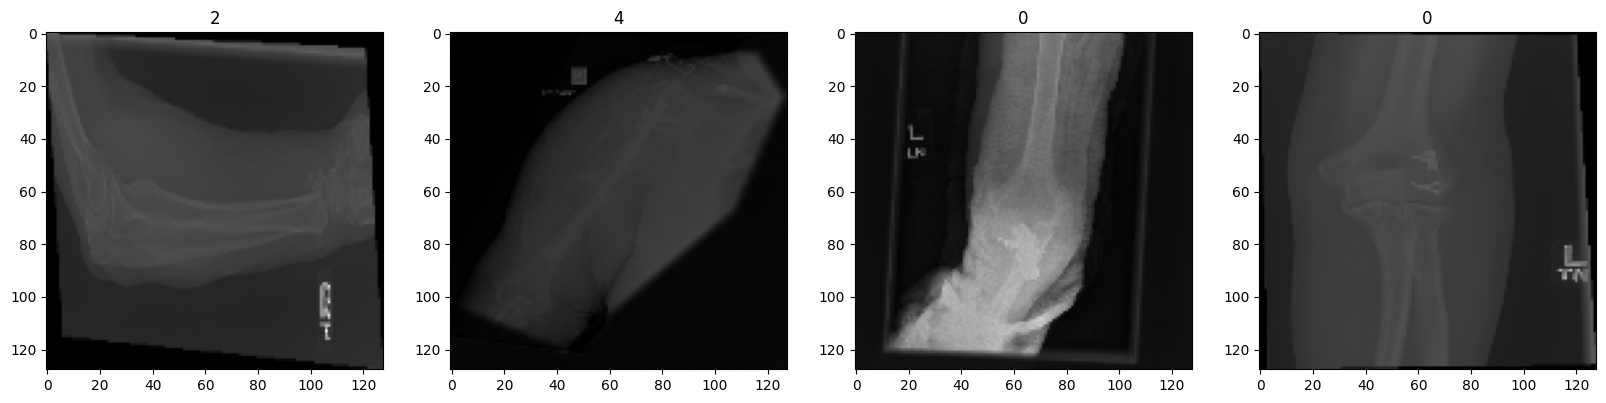

In [15]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### **SPLIT DATA 🪓**

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
print(f'train: {train_size}',f'test: {test_size}',f'val: {val_size}')
print(f'Leng Data: {len(data)}')

train: 4 test: 1 val: 2
Leng Data: 7


In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## **Modelo 📸**

### **Contruir Modelo 🔨**

In [18]:
model = Sequential()

model.add(Conv2D(32,(3,3),1, activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())    
model.add(Dense(128, activation='relu'))
model.add(Dense(7,activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

### **Entrenar Modelo 💪**

In [20]:
logdir = './logs'

In [21]:
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
4/4 [==============================] - 3s 119ms/step - loss: 1.9357 - accuracy: 0.2227 - val_loss: 1.8763 - val_accuracy: 0.3242
Epoch 2/20
4/4 [==============================] - 0s 92ms/step - loss: 1.8318 - accuracy: 0.2949 - val_loss: 1.7368 - val_accuracy: 0.3984
Epoch 3/20
4/4 [==============================] - 0s 93ms/step - loss: 1.6591 - accuracy: 0.4062 - val_loss: 1.5181 - val_accuracy: 0.4141
Epoch 4/20
4/4 [==============================] - 0s 95ms/step - loss: 1.5002 - accuracy: 0.4570 - val_loss: 1.4384 - val_accuracy: 0.4492
Epoch 5/20
4/4 [==============================] - 0s 95ms/step - loss: 1.3889 - accuracy: 0.4805 - val_loss: 1.2955 - val_accuracy: 0.5547
Epoch 6/20
4/4 [==============================] - 0s 93ms/step - loss: 1.2857 - accuracy: 0.5410 - val_loss: 1.1761 - val_accuracy: 0.5781
Epoch 7/20
4/4 [==============================] - 0s 93ms/step - loss: 1.1826 - accuracy: 0.5957 - val_loss: 1.1252 - val_accuracy: 0.6055
Epoch 8/20
4/4 [==========

### **Rendimiento ⚙️**

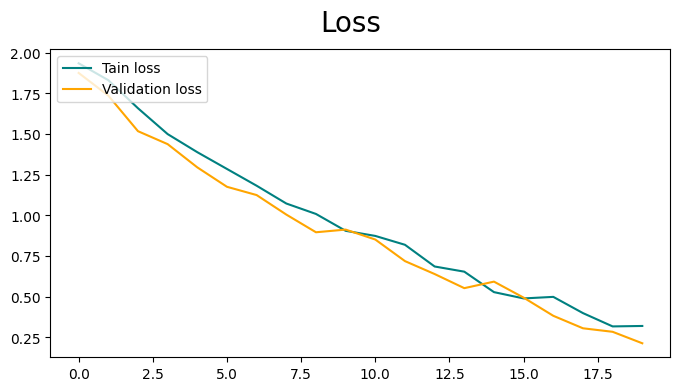

In [23]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'],color='teal',label='Tain loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

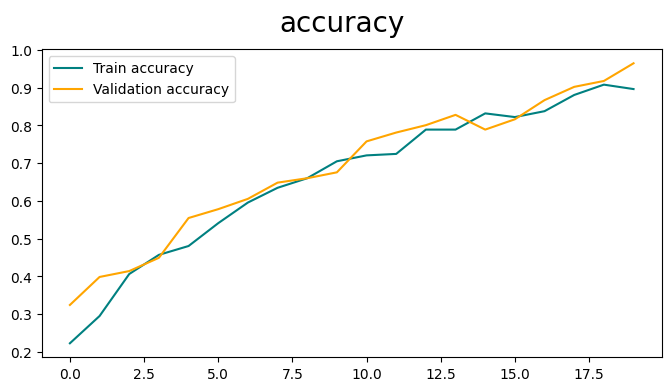

In [24]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'],color='teal',label='Train accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [25]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [26]:
pre = Precision()
re = Recall()
acc = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    y = tf.one_hot(y, depth=7)
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
precision = round(pre.result().numpy(), 2)
recall = round(re.result().numpy(), 2)
accuracy = round(acc.result().numpy(), 2)

print(f"Resultados:\n Precision: {precision}\n ReCall: {recall}\n Exactitud: {accuracy}")

Resultados:
 Precision: 1.0
 ReCall: 0.8799999952316284
 Exactitud: 0.0


## **Prediccion 🔮**

In [27]:
def carga_imagen(img_test_path):    
    img = cv2.imread(img_test_path)
    resize = tf.image.resize(img, (128, 128))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    return resize

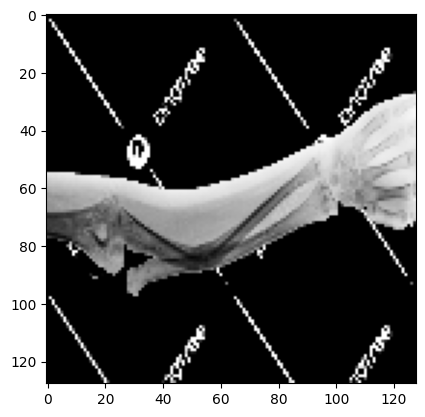

In [28]:
img_test_path = './pngtree-xray-image-of-forearm-ap-showing-fractured-shaft-of-ulnar-bone-png-image_13365053.png'
imagen_1 = carga_imagen(img_test_path)

In [29]:
def prediccion(imagen):   
    y_hat = model.predict(np.expand_dims(imagen/255,0))
    max_index = np.argmax(y_hat)
    max_index
    labels_aux = {0: 'Codo',
                  1: 'Dedo',
                  2: 'Antebrazo',
                  3: 'Mano',
                  4: 'Húmero',
                  5: 'Hombro',
                  6: 'Muñeca'}

    if max_index in labels_aux:
        prediccion_final = labels_aux[max_index]
    return print(f'La Radiografia corresponde a una fractura de {prediccion_final}')

In [30]:
prediccion(imagen_1)

La Radiografia corresponde a una fractura de Codo


## **Cargar Modelo ☁️**

In [31]:
model.save(os.path.join('models','Clasificador_Fracutra.h5'))

In [32]:
new_model = load_model('./models/Clasificador_Fracutra.h5')

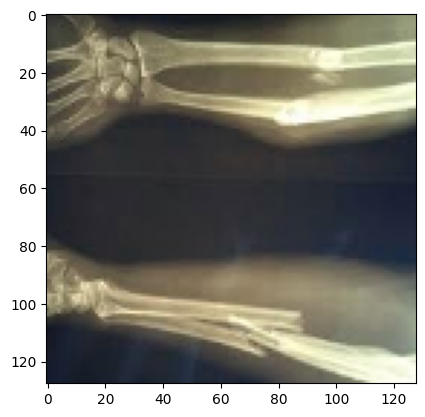

In [33]:
img_test_path = './download (2).jpeg'
imagen_2 = carga_imagen(img_test_path)

In [34]:
prediccion(imagen_2)

La Radiografia corresponde a una fractura de Antebrazo
